In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
from roboflow import Roboflow

In [4]:
rf = Roboflow(api_key="LTpT6Qjy7cU4K0MGGjVk")
project = rf.workspace("litter-raking-project").project("smart-poultry-farm-litter-raking")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to smart-poultry-farm-litter-raking-3 in yolov8:: 100%|██████████| 31948/31948 [00:10<00:00, 3115.63it/s]


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 22.3 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
model =YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 294MB/s]


In [8]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/smart-poultry-farm-litter-raking-3/data.yaml epochs=15 batch=8  plots=True

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/smart-poultry-farm-litter-raking-3/data.yaml, epochs=15, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

In [9]:
import os
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!mkdir '/content/drive/My Drive/yolov8'

mkdir: cannot create directory ‘/content/drive/My Drive/yolov8’: File exists


In [ ]:
!ls runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1712024072.928e254f8bfc.4704.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch8865.jpg  weights
P_curve.png					    train_batch8866.jpg
PR_curve.png					    train_batch8867.jpg


In [ ]:
from IPython.display import Image

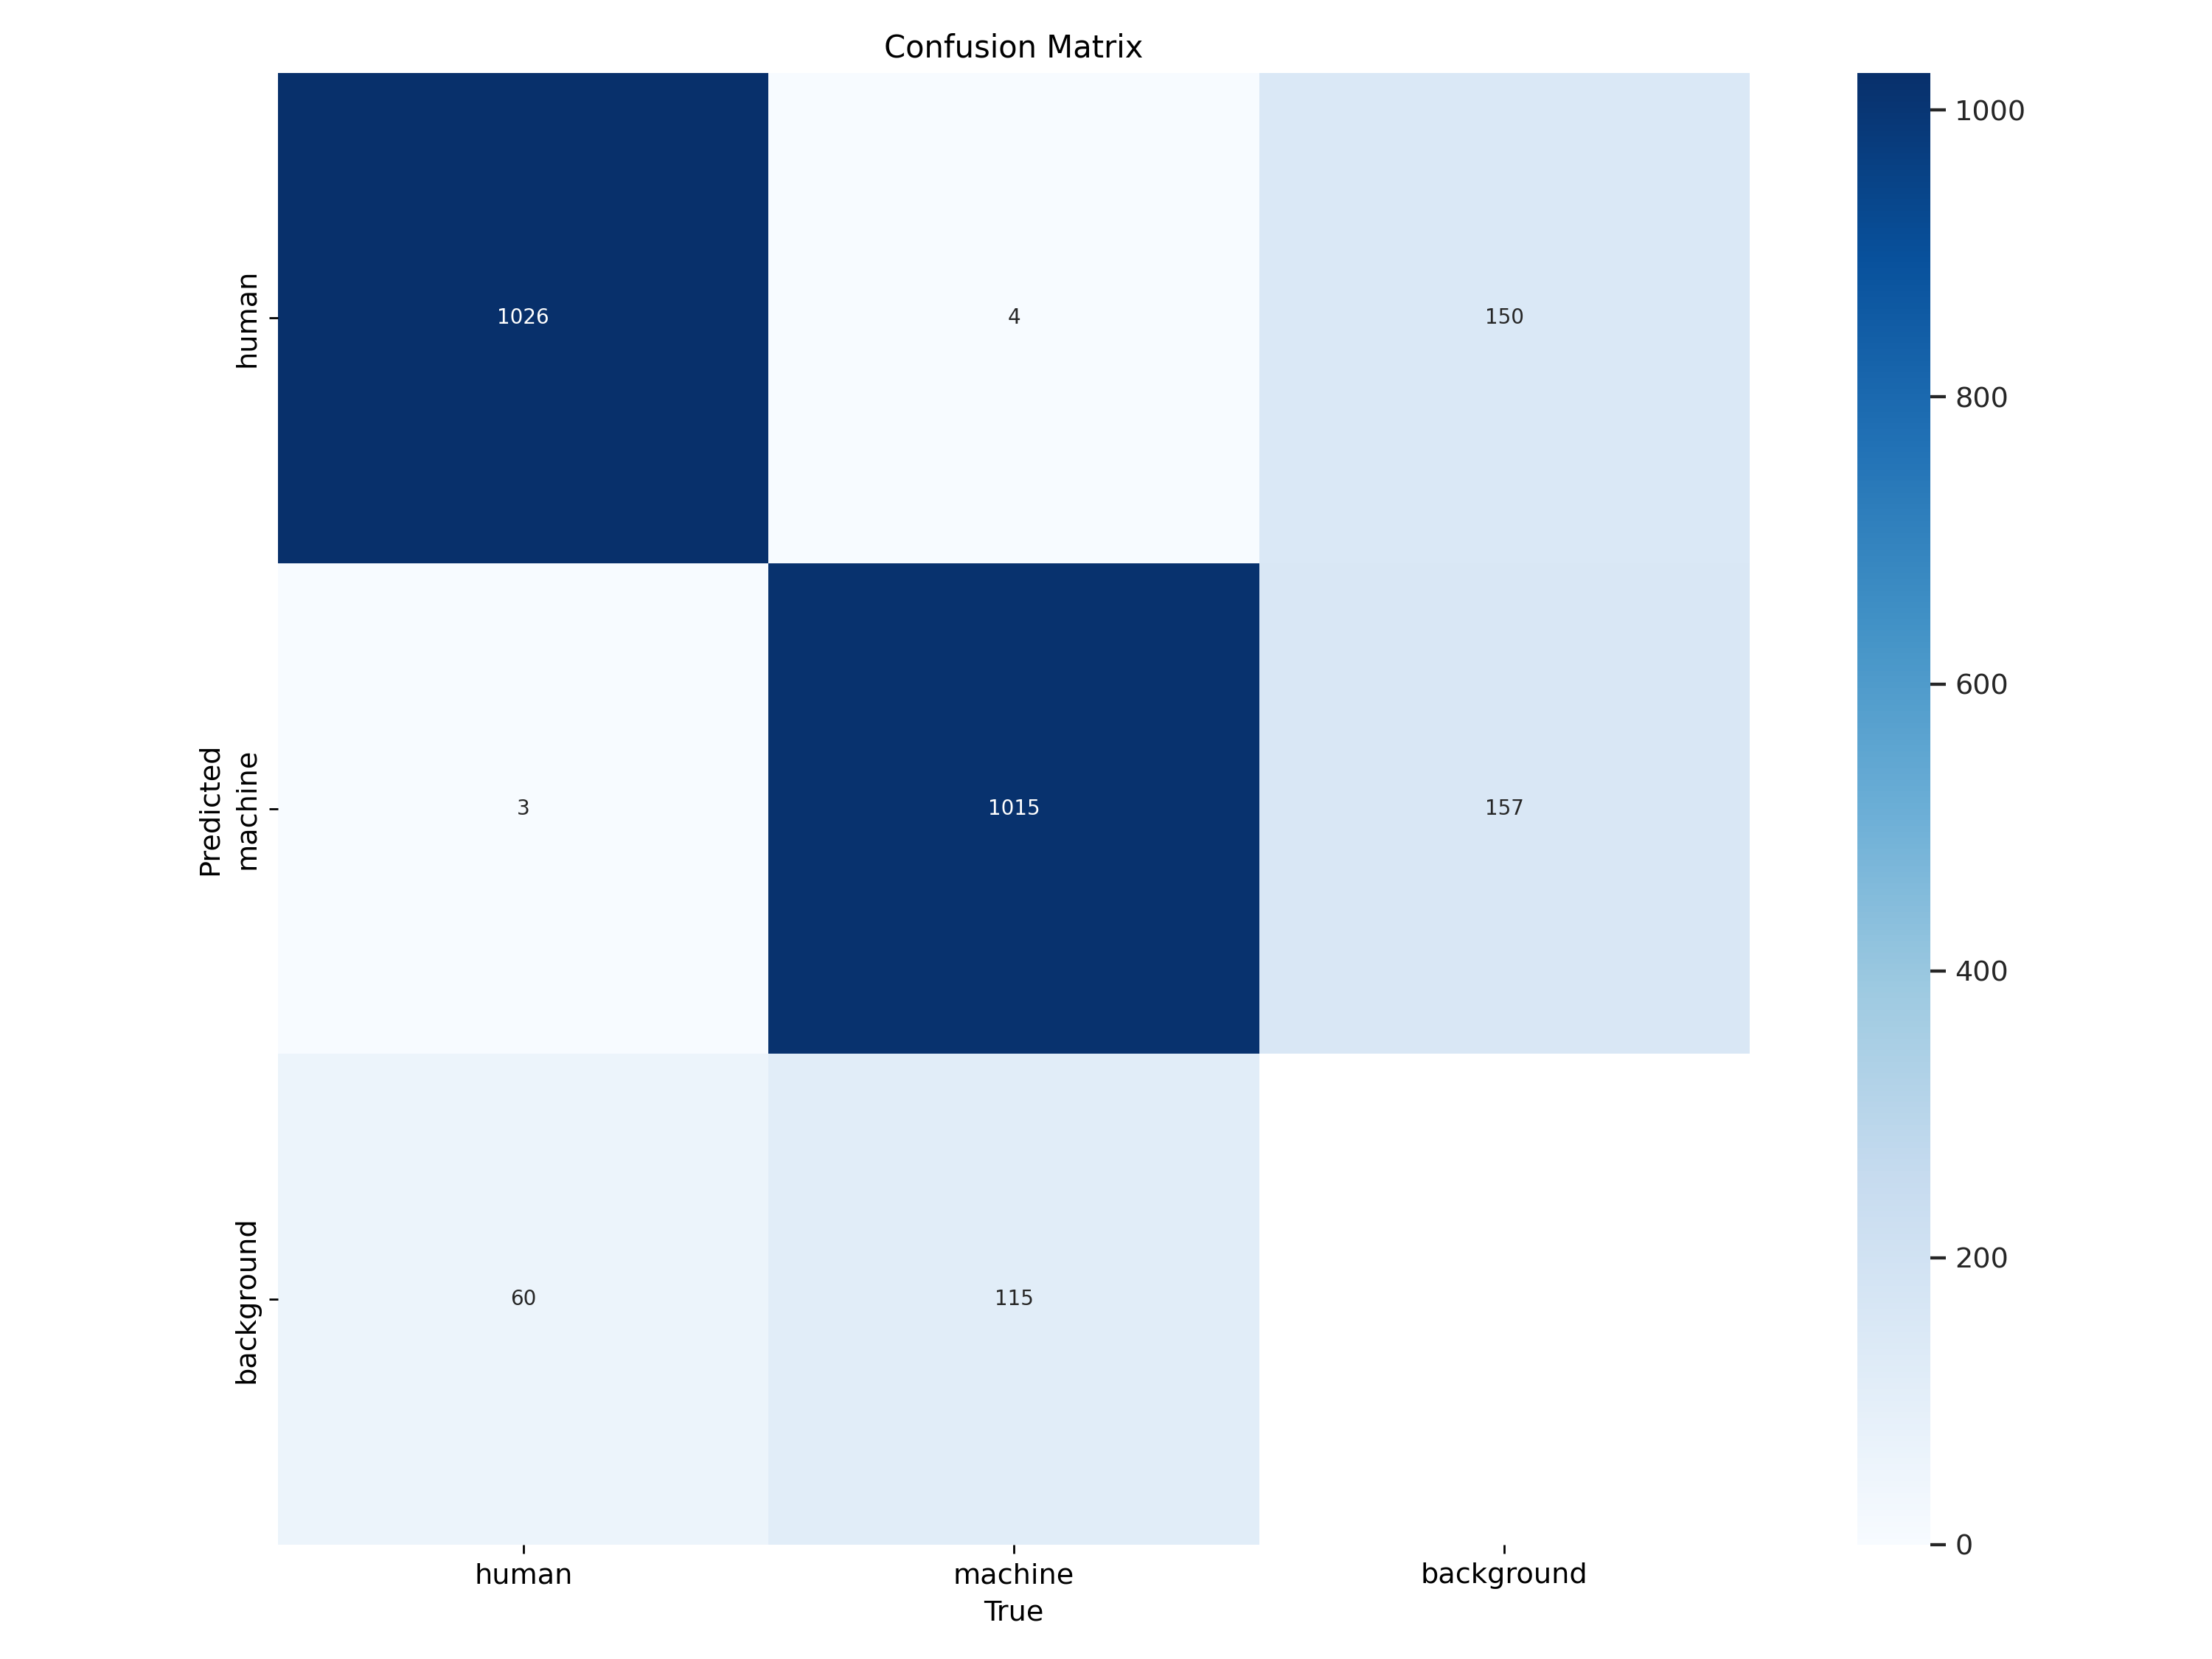

In [ ]:
Image(filename="/content/runs/detect/train/confusion_matrix.png",width=600)

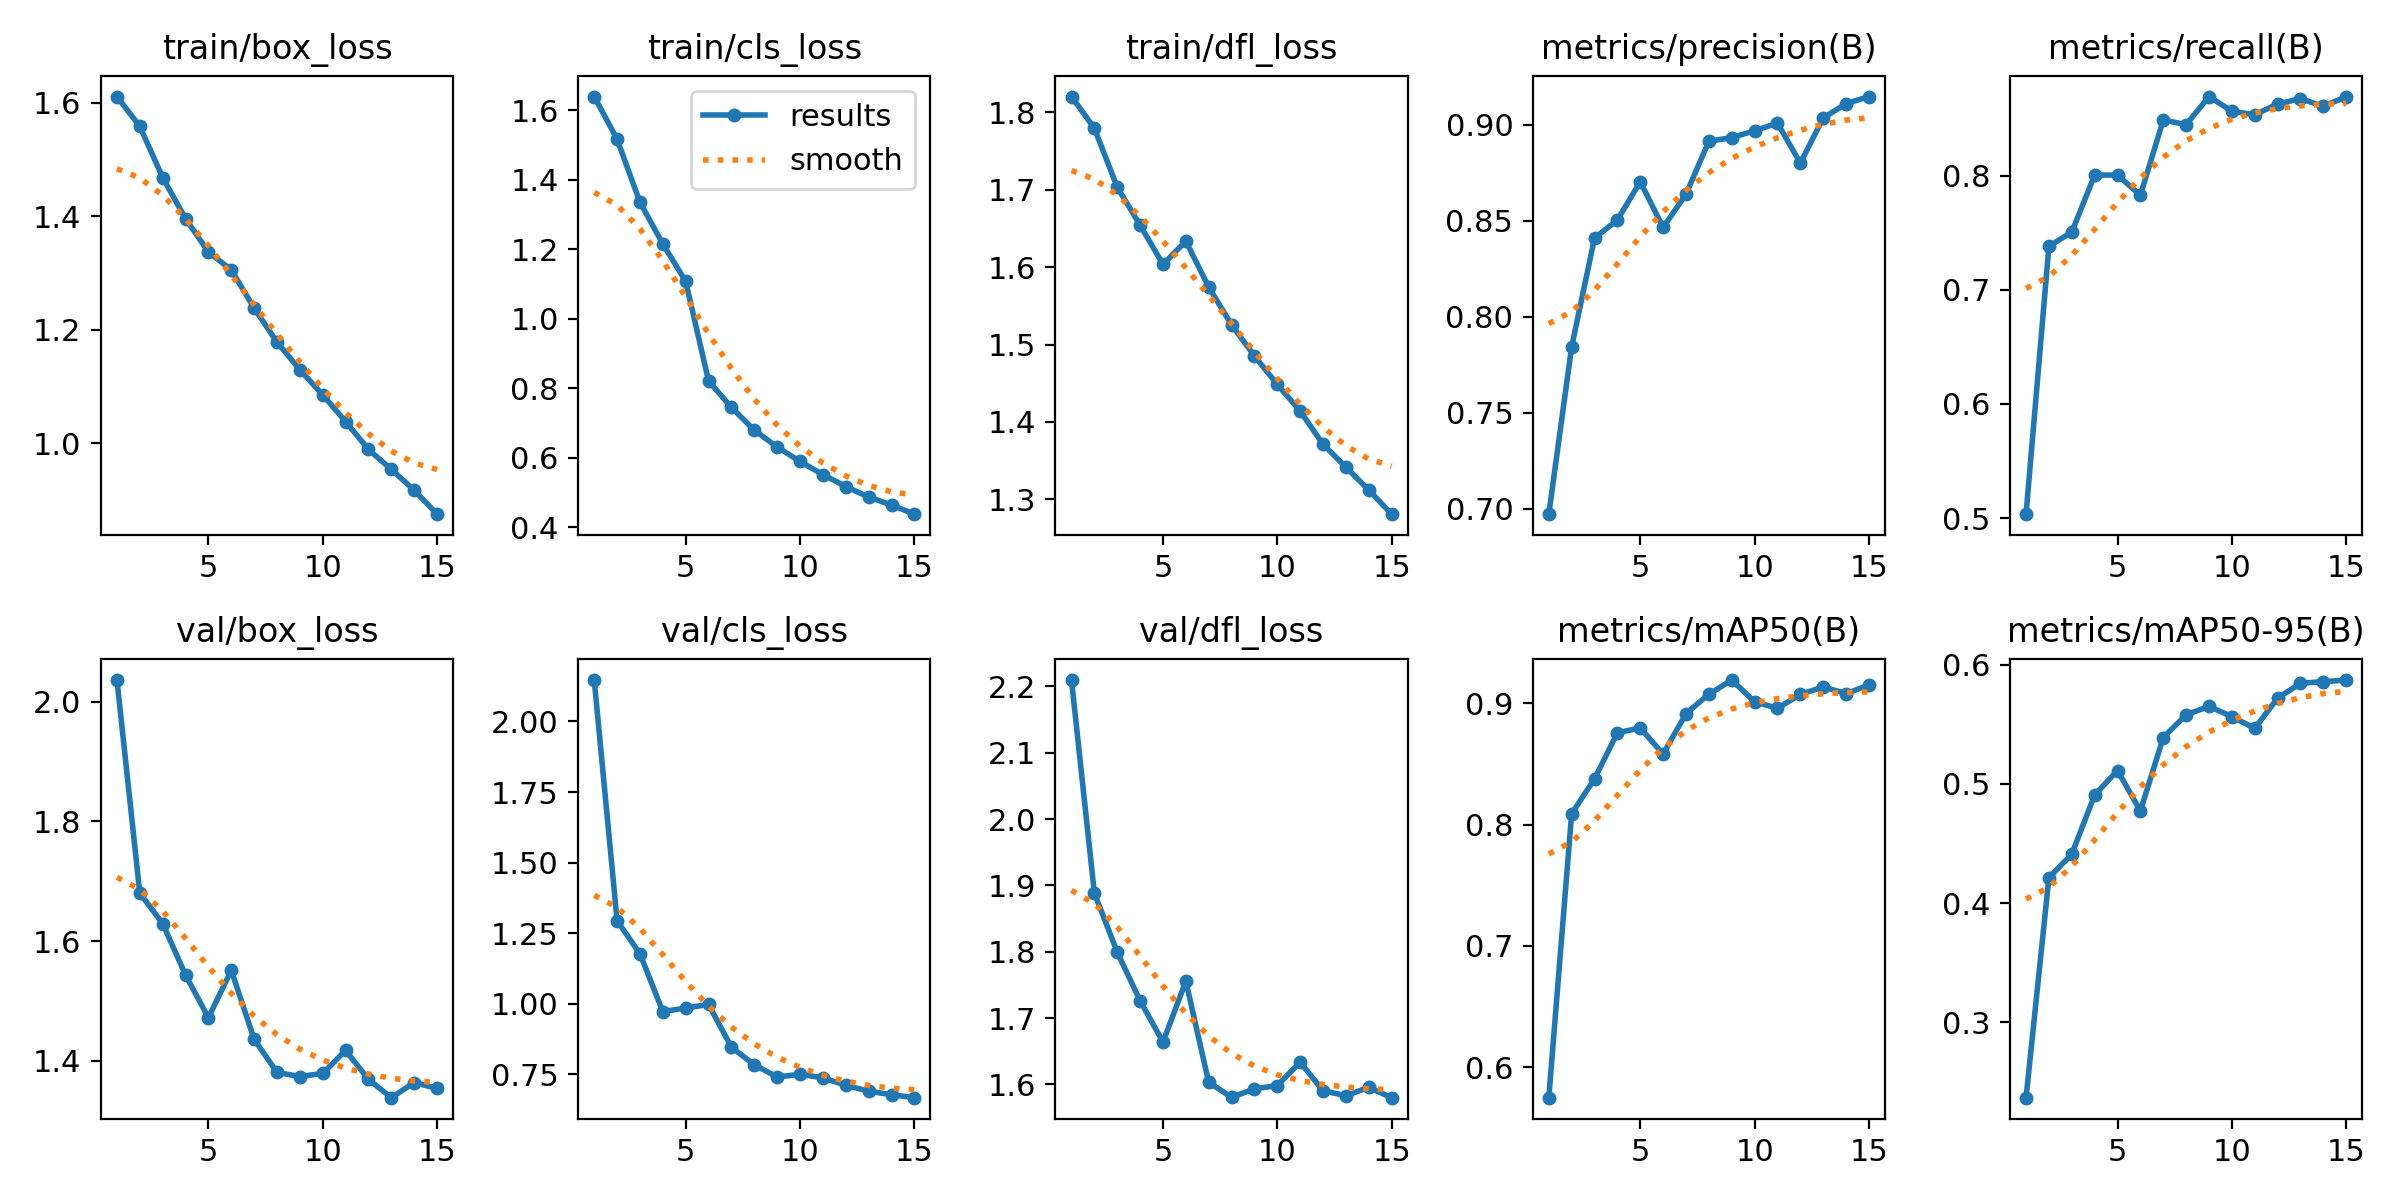

In [ ]:
Image(filename='/content/runs/detect/train/results.png',width=600)

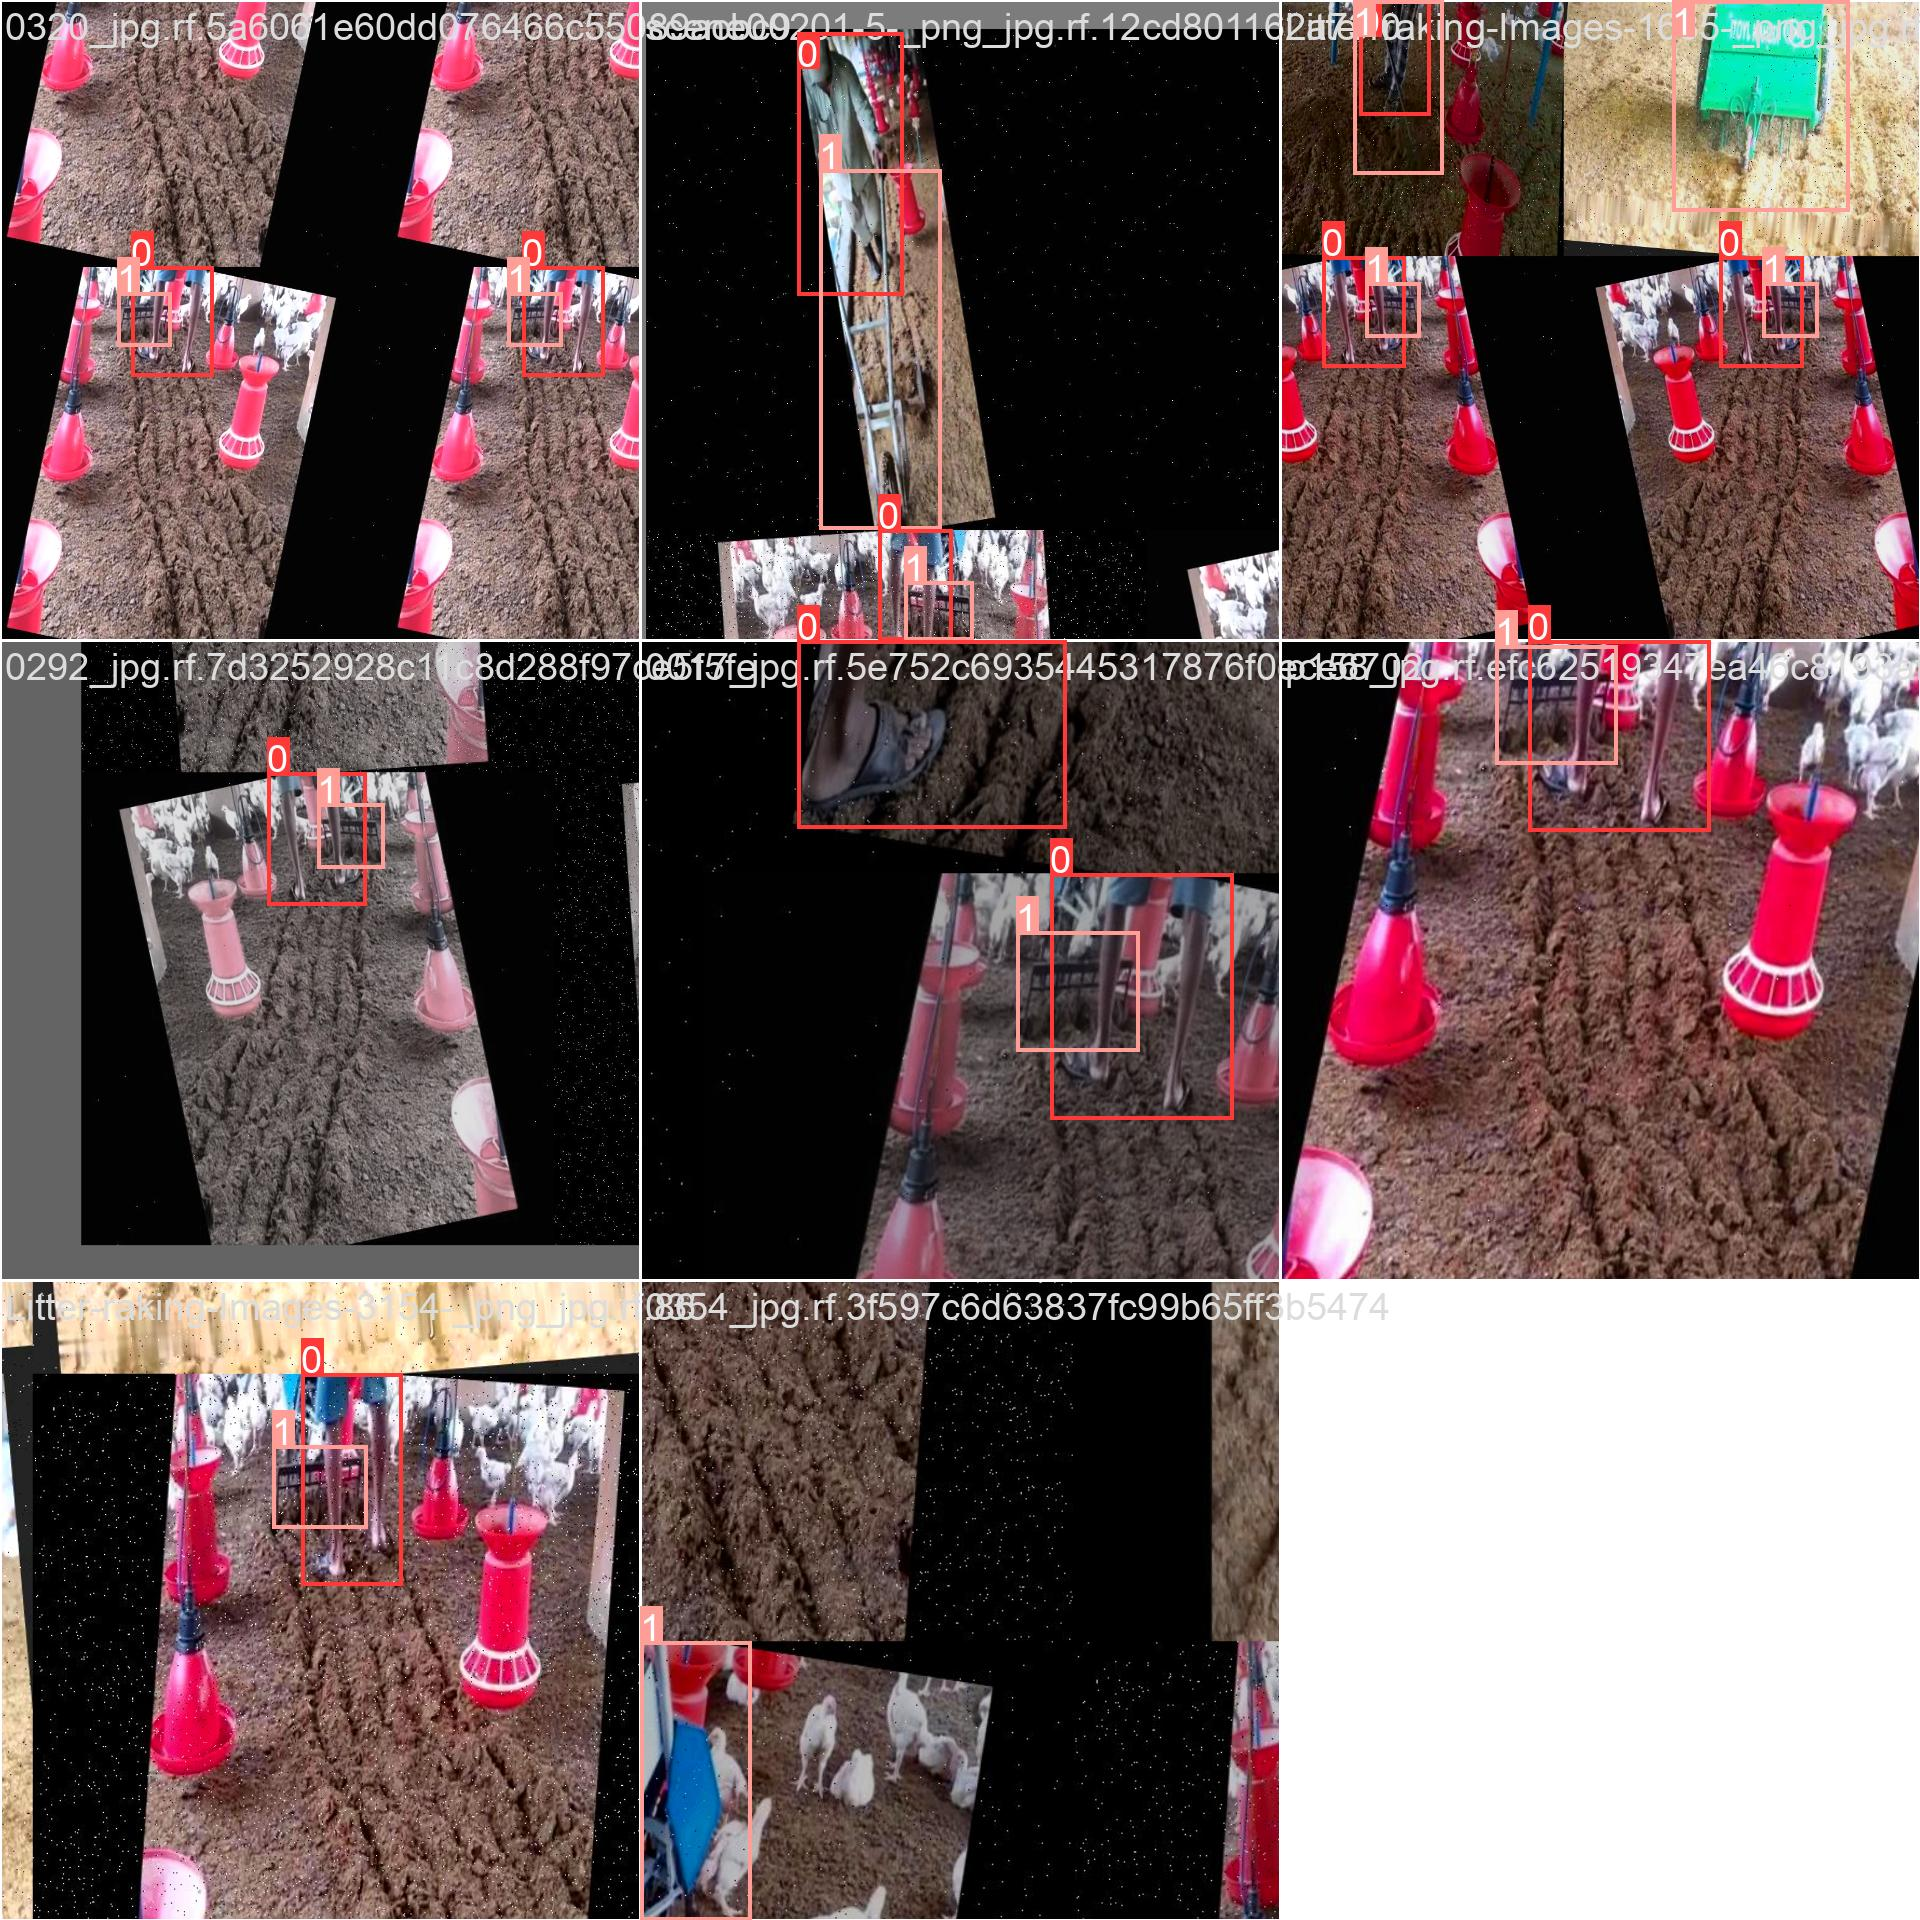

In [ ]:
Image(filename='/content/runs/detect/train/train_batch0.jpg',width=600)

#validate Custome Model


In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/smart-poultry-farm-litter-raking-3/data.yaml

Ultralytics YOLOv8.1.41 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/smart-poultry-farm-litter-raking-3/valid/labels.cache... 1181 images, 0 backgrounds, 0 corrupt: 100% 1181/1181 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 74/74 [00:32<00:00,  2.29it/s]
                   all       1181       2223      0.915      0.869      0.915      0.587
                 human       1181       1089      0.891      0.913      0.914      0.621
               machine       1181       1134      0.939      0.825      0.916      0.553
Speed: 1.1ms preprocess, 19.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


#predict


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

# Predict with the model
results = model('/content/smart-poultry-farm-litter-raking-3/train/images/0-2-_jpg.rf.1b5d8096f6170bbd667c15d270f2c4de.jpg')


image 1/1 /content/smart-poultry-farm-litter-raking-3/train/images/0-2-_jpg.rf.1b5d8096f6170bbd667c15d270f2c4de.jpg: 640x640 1 human, 1 machine, 37.2ms
Speed: 3.3ms preprocess, 37.2ms inference, 565.4ms postprocess per image at shape (1, 3, 640, 640)


#inference with Custom Model


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/smart-poultry-farm-litter-raking-3/test/images save=True

Ultralytics YOLOv8.1.41 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364327-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultrytreatment-_poultrydiseases-480P-_11000_jpeg_jpg.rf.e3eceffa14a1caa23fda46f08a9d9ca7.jpg: 640x640 1 human, 1 machine, 48.7ms
image 2/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364335-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultrytreatment-_poultrydiseases-480P-_6000_jpeg_jpg.rf.d2f0e790565f6d06966e1621e271d447.jpg: 640x640 1 human, 1 machine, 37.2ms
image 3/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364337-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultrytreatment-_poultrydiseases-480P-_5000_jpeg_jpg.rf.b4062c9a2568ad80390676481b3cc05e.jpg: 640x640 1 human, 1 machin

In [ ]:
model.train(data="/content/smart-poultry-farm-litter-raking-3/data.yaml" ,epochs=2)

Ultralytics YOLOv8.1.38 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/smart-poultry-farm-litter-raking-3/data.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 26.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 112MB/s]


AMP: checks passed ✅


train: Scanning /content/smart-poultry-farm-litter-raking-3/train/labels... 14184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14184/14184 [00:28<00:00, 498.06it/s]


train: New cache created: /content/smart-poultry-farm-litter-raking-3/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 960, len(boxes) = 28695. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/smart-poultry-farm-litter-raking-3/valid/labels... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:02<00:00, 487.40it/s]


val: New cache created: /content/smart-poultry-farm-litter-raking-3/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2      7.16G      1.562       1.55      1.764         33        640: 100%|██████████| 887/887 [07:56<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:19<00:00,  1.93it/s]

                   all       1181       2223      0.619      0.675      0.651      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2      7.38G      1.424      1.238      1.653         26        640: 100%|██████████| 887/887 [07:46<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:19<00:00,  1.89it/s]

                   all       1181       2223       0.82      0.767      0.833      0.461



2 epochs completed in 0.277 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.38 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:23<00:00,  1.59it/s]


                   all       1181       2223      0.821      0.767      0.833      0.461
                 human       1181       1089      0.782      0.872      0.877      0.505
               machine       1181       1134       0.86      0.661       0.79      0.417
Speed: 0.3ms preprocess, 9.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ee4f8436dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
infer =YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
infer.predict("/content/smart-poultry-farm-litter-raking-3/test/images", save=True)


image 1/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364327-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultrytreatment-_poultrydiseases-480P-_11000_jpeg_jpg.rf.e3eceffa14a1caa23fda46f08a9d9ca7.jpg: 640x640 1 human, 1 machine, 37.1ms
image 2/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364335-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultrytreatment-_poultrydiseases-480P-_6000_jpeg_jpg.rf.d2f0e790565f6d06966e1621e271d447.jpg: 640x640 1 human, 1 machine, 37.1ms
image 3/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364337-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultrytreatment-_poultrydiseases-480P-_5000_jpeg_jpg.rf.b4062c9a2568ad80390676481b3cc05e.jpg: 640x640 1 human, 1 machine, 36.5ms
image 4/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364342-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultryt

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'human', 1: 'machine'}
 obb: None
 orig_img: array([[[237, 245, 244],
         [237, 245, 244],
         [237, 245, 244],
         ...,
         [ 86,  58, 205],
         [ 82,  57, 201],
         [ 81,  56, 200]],
 
        [[234, 242, 241],
         [234, 242, 241],
         [234, 242, 241],
         ...,
         [ 86,  58, 205],
         [ 82,  56, 203],
         [ 81,  55, 202]],
 
        [[238, 244, 243],
         [238, 244, 243],
         [237, 243, 242],
         ...,
         [ 86,  57, 207],
         [ 82,  55, 205],
         [ 81,  55, 203]],
 
        ...,
 
        [[123, 139, 155],
         [123, 139, 155],
         [121, 137, 153],
         ...,
         [ 33,  48,  64],
         [ 33,  48,  64],
         [ 33,  48,  64]],
 
        [[109, 125, 141],
         [104, 120, 136],
         [ 95, 111, 127],
         ...,
     

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/yolov8n.pt')  # load an official model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom trained model

# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.1.41 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.30GHz)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (49.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 38.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.8s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 13.7s, saved as '/content/runs/detect/train/weights/best.onnx' (98.8 MB)

Export complete (19.2s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo va

'/content/runs/detect/train/weights/best.onnx'